# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Métodos paramétricos de Identificación

## Recapitulando

Para el siguiente modelo lineal que se pretende identificar:

$$y[k] = \phi[k]\theta + \varepsilon[k]$$

Se tiene que: $y[k]$ son valores medidos de la salida (señal capturada) y los parámetros a Identificar son $\theta$, asumiendo que se pretende minimizar $\varepsilon$ por tanto la función de costo a minimizar sería:

$$f(\theta_{LS}) = \frac{1}{2}|y_N - \phi_N\theta|^2$$

$\phi_N$ es la matriz de regresión que su estructura depende generalmente de la entrada, sus derivadas y de las derivadas de la salida y se estructura según la aproximación que se quiera hacer. 

Hasta el momento sin tener la medición, lo que se ha hecho es partir de un modelo conocido y contaminarlo con un ruido de media 0.

$$y_N = y_I + e_N$$

Donde $y_I$ es el **valor ideal** y $e_N$ un error de medición.

Entonces el modelo estimado será:

$$y_e = \phi.\theta_{LS}$$

Donde $\theta_{LS} = \phi^+.y_N$, además se tendría que:

$$\phi^+ = (\phi^T.\phi)^{-1}\phi^T$$


## Mínimos cuadrados con Pesos (WLS)

Incluyendo pesos la función de costo a minimizar es:

$$f(\theta_{WLS}) = \frac{1}{2}|y_N - \phi_N\theta|^2.W$$ Reeescribiendo la ecuación tendríamos:

$$f(\theta_{WLS}) = \frac{1}{2}|\tilde{y_N} - \tilde{\phi_N}\theta_{WLS}|^2$$

Donde la matriz W es una matriz diagonal con pesos (varianzas) en la diagonal principal. El modelo identificado estaría dado por:

$$y_e = \tilde\phi.\theta_{WLS}$$

Además:

$$\theta_{WLS} = \tilde{\phi^+}.\tilde{y_N}$$

Tener en cuenta que:

$$\tilde{\phi^+} = W^{1/2}.\phi$$
$$\tilde{y_N} = W^{1/2}.y_N$$

In [1]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 3E86-B1D5

 Directorio de C:\Users\Jairo_PC\Documents\GitHub\System_identification

16/03/2023  09:03    <DIR>          .
16/03/2023  09:03    <DIR>          ..
08/02/2023  14:26                66 .gitattributes
14/02/2023  14:00             1,469 .gitignore
15/03/2023  18:06    <DIR>          .ipynb_checkpoints
10/02/2023  16:57            59,820 class_01.ipynb
17/02/2023  14:41            61,963 class_02_01.ipynb
08/03/2023  09:32           114,029 class_02_02.ipynb
10/03/2023  18:07           220,989 class_03_01.ipynb
13/03/2023  21:27            73,398 class_03_02.ipynb
14/03/2023  09:52            65,077 class_04_01.ipynb
13/03/2023  21:05            13,606 class_04_02.ipynb
16/03/2023  09:03            76,557 class_05_01.ipynb
15/03/2023  21:02            40,157 class_05_02.ipynb
15/03/2023  21:33            58,603 class_05_03.ipynb
14/03/2023  09:39    <DIR>          data
17/02/2023  11:09         

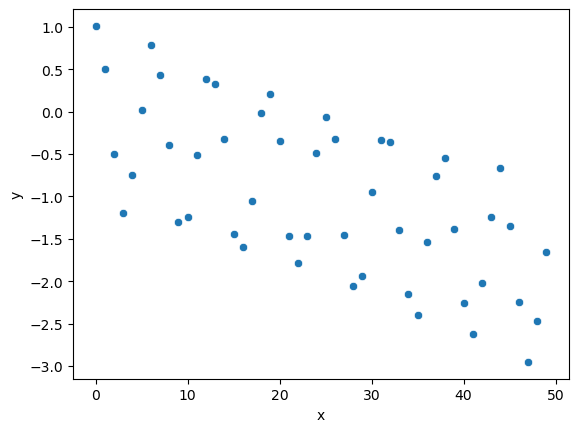

In [2]:
datos = pd.read_csv ('data\data01.csv')
sns.scatterplot(datos,x ='x',y = 'y')
N = np.size(datos.x)

var = math.sqrt(1/datos.y.var())
_W = np.eye(N)*var

In [3]:
### Definiendo phi según se acomode a necesidad

phi = np.array([np.ones(N), np.cos(datos.x), datos.x]).transpose()
_phi = np.dot(_W,phi)
A = np.dot(_phi.transpose(),_phi)
Mpr = np.linalg.inv(A)

In [4]:
#Obteniendo la matriz de estimadores
B = np.dot(_phi.transpose(),datos.y)
theta = np.dot(Mpr,B)
theta

array([-0.00691984,  0.96229737, -0.03795169])

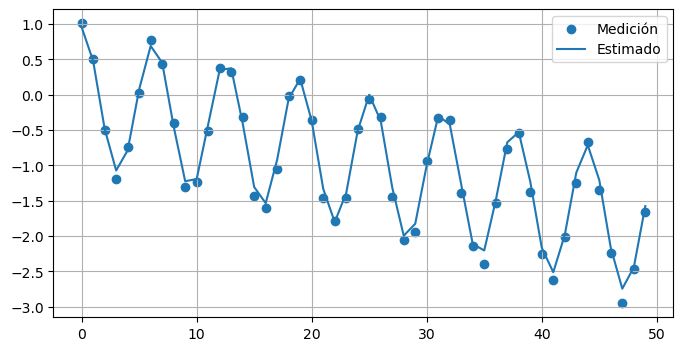

In [5]:
#y_e = np.polyval(np.flip(theta),datos.x) 
y_e = theta[0]+theta[1]*np.cos(datos.x)+theta[2]*datos.x
## Graficando Las 2 funciones

plt.figure(figsize=(8,4))
plt.scatter(datos.x,datos.y)
plt.plot(datos.x,y_e)

plt.legend(["Medición","Estimado"])
plt.grid()